Importing the required modules

We will be using logistic regression for the analysis 

In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid" , color_codes=True)

Dataset has 10000 records with 14 columns showing information abput each customer.

In [2]:
data = pd.read_csv("C:\\Users\\RAHIL\\SA_Project\\churn.csv")
data = data.dropna()
print(data.shape)
print(list(data.columns))

(10000, 14)
['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited']


In [3]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [4]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
data['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [24]:
data['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

More thank 10 percent of customers in the dataset have exited the bank. So we have an acceptable cardinality.

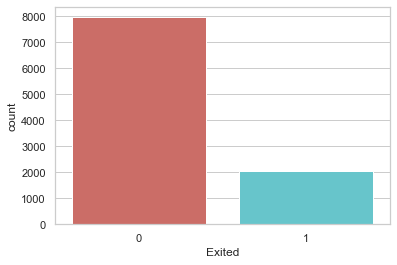

<Figure size 432x288 with 0 Axes>

In [7]:
sns.countplot(x='Exited', data = data , palette = 'hls')
plt.show()
plt.savefig('countplot')

In [27]:
res_geo = data[(data['Geography'] == 'France') &(data['Exited']==1 )]
print("Total france customers 5014. percentage of customers exited are {0}".format(res_geo['Geography'].value_counts()/5014*100))

res_geo = data[(data['Geography'] == 'Germany') &(data['Exited']==1 )]
print("Total Germany customers 2509.percentage of customers exited are {0}".format(res_geo['Geography'].value_counts()/2509*100))

res_geo = data[(data['Geography'] == 'Spain') &(data['Exited']==1 )]
print("Total Spain customers 2477. percentage of customers exited are  {0}".format(res_geo['Geography'].value_counts()/2477*100))


Total france customers 5014. percentage of customers exited are France    16.154767
Name: Geography, dtype: float64
Total Germany customers 2509.percentage of customers exited are Germany    32.443204
Name: Geography, dtype: float64
Total Spain customers 2477. percentage of customers exited are  Spain    16.673395
Name: Geography, dtype: float64


So highest churn rate is from Germany

In [34]:
res_ger_1= data[(data['Geography'] == 'Germany') &(data['Exited']==1 )]
res_ger_0 = data[(data['Geography'] == 'Germany') &(data['Exited']==0 )]

print("Average credit score of German customers who exited: {0}".format(res_ger_1["CreditScore"].mean()))
print("Average credit score of German customers who did not exit is {0}".format(res_ger_0["CreditScore"].mean()))

res_fr_1= data[(data['Geography'] == 'France') &(data['Exited']==1 )]
res_fr_0 = data[(data['Geography'] == 'France') &(data['Exited']==0 )]

print("Average credit score of French customers who exited: {0}".format(res_fr_1["CreditScore"].mean()))
print("Average credit score of French customers who did not exit is {0}".format(res_fr_0["CreditScore"].mean()))

res_s_1= data[(data['Geography'] == 'Spain') &(data['Exited']==1 )]
res_s_0 = data[(data['Geography'] == 'Spain') &(data['Exited']==0 )]

print("Average credit score of Spanish customers who exited: {0}".format(res_s_1["CreditScore"].mean()))
print("Average credit score of Spanish customers who did not exit is {0}".format(res_s_0["CreditScore"].mean()))

Average credit score of German customers who exited: 647.6891891891892
Average credit score of German customers who did not exit is 653.2613569321534
Average credit score of French customers who exited: 641.9148148148148
Average credit score of French customers who did not exit is 651.162226450999
Average credit score of Spanish customers who exited: 647.4842615012107
Average credit score of Spanish customers who did not exit is 652.1041666666666


So no significant difference in credit score of both parties. 

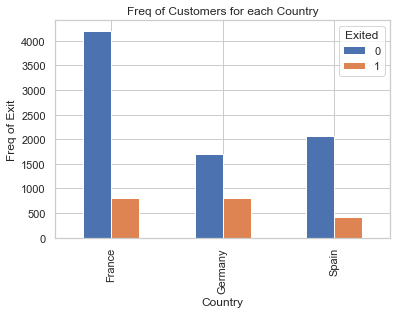

In [9]:
%matplotlib inline
pd.crosstab (data.Geography, data.Exited).plot(kind='bar')
plt.title('Freq of Customers for each Country')
plt.xlabel('Country')
plt.ylabel('Freq of Exit')
plt.savefig('exited_country_customer')

In [ ]:
Most customers are from france. 

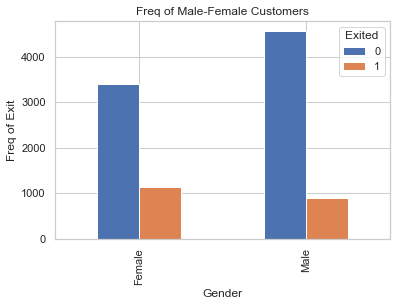

In [23]:
pd.crosstab (data.Gender, data.Exited).plot(kind='bar')
plt.title('Freq of Male-Female Customers')
plt.xlabel('Gender')
plt.ylabel('Freq of Exit')
plt.savefig('exited_gender_customer')

In [35]:
data['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [36]:
res_gen = data[(data['Gender'] == 'Male') &(data['Exited']==1 )]
print("Total Male customers 5457. percentage of customers exited are {0}".format(res_gen['Gender'].value_counts()/5457*100))

res_gen = data[(data['Gender'] == 'Female') &(data['Exited']==1 )]
print("Total Female customers 4543. percentage of customers exited are {0}".format(res_gen['Gender'].value_counts()/4543*100))


Total Male customers 5457. percentage of customers exited are Male    16.455928
Name: Gender, dtype: float64
Total Female customers 4543. percentage of customers exited are Female    25.071539
Name: Gender, dtype: float64


More female customers leave bank than male.

In [42]:
res_gen_geo = data[(data['Gender'] == 'Female') & (data['Geography'] == 'Germany') ]
print(res_gen_geo['Exited'].value_counts())

res_gen_geo = data[(data['Gender'] == 'Female') & (data['Geography'] == 'France') ]
print(res_gen_geo['Exited'].value_counts())

res_gen_geo = data[(data['Gender'] == 'Female') & (data['Geography'] == 'Spain') ]
print(res_gen_geo['Exited'].value_counts())

0    745
1    448
Name: Exited, dtype: int64
0    1801
1     460
Name: Exited, dtype: int64
0    858
1    231
Name: Exited, dtype: int64


German Female customers have higher churn rate.

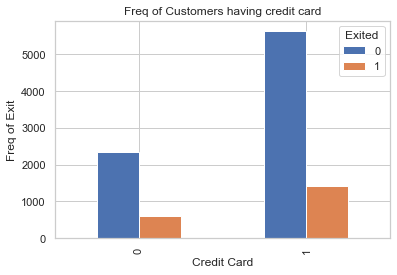

In [46]:
pd.crosstab (data.HasCrCard, data.Exited).plot(kind='bar')
plt.title('Freq of Customers having credit card')
plt.xlabel('Credit Card')
plt.ylabel('Freq of Exit')
plt.savefig('exited_credit_customer')

In [55]:
res_age_30 = data[(data['Age'] <= 30) ]
print(res_age_30['Exited'].value_counts())

res_age_45 = data[(data['Age'] > 30) & (data['Age'] <= 45) ]
print(res_age_45['Exited'].value_counts())

res_age_60 = data[(data['Age'] > 45) & (data['Age'] <= 60) ]
print(res_age_60['Exited'].value_counts())

res_age_90 = data[(data['Age'] > 60) ]
print(res_age_90['Exited'].value_counts())

0    1820
1     148
Name: Exited, dtype: int64
0    4989
1     932
Name: Exited, dtype: int64
1    842
0    805
Name: Exited, dtype: int64
0    349
1    115
Name: Exited, dtype: int64


Almost Half the people in age group of 45 to 60 have higher churn rate.

# Building the model now 

In [61]:
#converting to numeric variable for gender and geography 
gender = {'Male': 1,'Female': 0}
  
data.Gender = [gender[item] for item in data.Gender]

data.head()

KeyError: 0

In [62]:
print(data.dtypes)

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender               int64
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object


In [63]:
geography = {'France': 0,'Spain': 1, 'Germany':2}
  
data.Geography = [geography[item] for item in data.Geography]

data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,1,0,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,1,0,43,2,125510.82,1,1,1,79084.10,0


In [64]:
print(data.dtypes)

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography            int64
Gender               int64
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object


In [65]:
#dropping unnecessary columns
data = data.drop(columns=['RowNumber', 'CustomerId', 'Surname' ], axis=1)


                 RowNumber  CustomerId  CreditScore       Age    Tenure  \
RowNumber         1.000000    0.004202     0.005840  0.000783 -0.006495   
CustomerId        0.004202    1.000000     0.005308  0.009497 -0.014883   
CreditScore       0.005840    0.005308     1.000000 -0.003965  0.000842   
Age               0.000783    0.009497    -0.003965  1.000000 -0.009997   
Tenure           -0.006495   -0.014883     0.000842 -0.009997  1.000000   
Balance          -0.009067   -0.012419     0.006268  0.028308 -0.012254   
NumOfProducts     0.007246    0.016972     0.012238 -0.030680  0.013444   
HasCrCard         0.000599   -0.014025    -0.005458 -0.011721  0.022583   
IsActiveMember    0.012044    0.001665     0.025651  0.085472 -0.028362   
EstimatedSalary  -0.005988    0.015271    -0.001384 -0.007201  0.007784   
Exited           -0.016571   -0.006248    -0.027094  0.285323 -0.014001   

                  Balance  NumOfProducts  HasCrCard  IsActiveMember  \
RowNumber       -0.009067   

<AxesSubplot:>

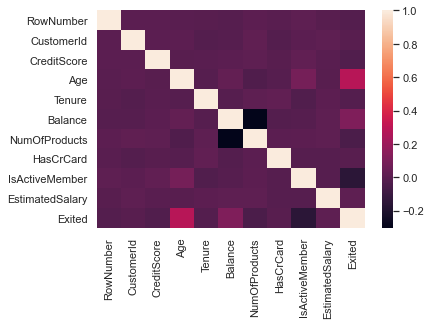

In [7]:

import seaborn as sns
corr = data.corr()
print(corr)


<AxesSubplot:>

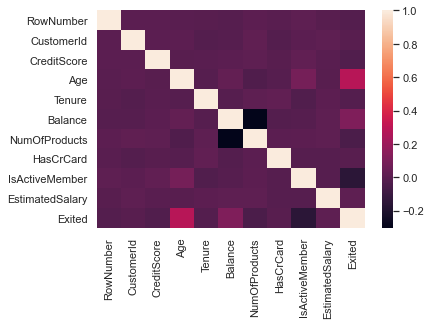

In [8]:
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [67]:
#feature engineering
data['balancetosalaryratio']=data.Balance/data.EstimatedSalary
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,balancetosalaryratio
0,619,0,0,42,2,0.00,1,1,1,101348.88,1,0.000000
1,608,1,0,41,1,83807.86,1,0,1,112542.58,0,0.744677
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1,1.401375
3,699,0,0,39,1,0.00,2,0,0,93826.63,0,0.000000
4,850,1,0,43,2,125510.82,1,1,1,79084.10,0,1.587055


In [68]:
data['TenureByAge'] = data.Tenure/(data.Age)
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,balancetosalaryratio,TenureByAge
0,619,0,0,42,2,0.00,1,1,1,101348.88,1,0.000000,0.047619
1,608,1,0,41,1,83807.86,1,0,1,112542.58,0,0.744677,0.024390
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1,1.401375,0.190476
3,699,0,0,39,1,0.00,2,0,0,93826.63,0,0.000000,0.025641
4,850,1,0,43,2,125510.82,1,1,1,79084.10,0,1.587055,0.046512


In [69]:
#creditscorebyage
data['CreditScoreGivenAge'] = data.CreditScore/(data.Age)
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,balancetosalaryratio,TenureByAge,CreditScoreGivenAge
0,619,0,0,42,2,0.00,1,1,1,101348.88,1,0.000000,0.047619,14.738095
1,608,1,0,41,1,83807.86,1,0,1,112542.58,0,0.744677,0.024390,14.829268
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1,1.401375,0.190476,11.952381
3,699,0,0,39,1,0.00,2,0,0,93826.63,0,0.000000,0.025641,17.923077
4,850,1,0,43,2,125510.82,1,1,1,79084.10,0,1.587055,0.046512,19.767442


In [70]:
'''For the one hot variables, we change 0 to -1 so that the models can capture a negative relation 
where the attribute in inapplicable instead of 0'''

data.loc[data.HasCrCard == 0, 'HasCrCard'] = -1
data.loc[data.IsActiveMember == 0, 'IsActiveMember'] = -1
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,balancetosalaryratio,TenureByAge,CreditScoreGivenAge
0,619,0,0,42,2,0.00,1,1,1,101348.88,1,0.000000,0.047619,14.738095
1,608,1,0,41,1,83807.86,1,-1,1,112542.58,0,0.744677,0.024390,14.829268
2,502,0,0,42,8,159660.80,3,1,-1,113931.57,1,1.401375,0.190476,11.952381
3,699,0,0,39,1,0.00,2,-1,-1,93826.63,0,0.000000,0.025641,17.923077
4,850,1,0,43,2,125510.82,1,1,1,79084.10,0,1.587055,0.046512,19.767442


In [71]:
#onehotencoding the geography as we dont want model to assume that France< Spain, Spain< France etc.
data1 = pd.get_dummies(data,prefix=['geography'], columns = ['Geography'])
data2 = pd.get_dummies(data1,prefix=['Gender'], columns = ['Gender'])
data2.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,balancetosalaryratio,TenureByAge,CreditScoreGivenAge,geography_0,geography_1,geography_2,Gender_0,Gender_1
0,619,42,2,0.00,1,1,1,101348.88,1,0.000000,0.047619,14.738095,1,0,0,1,0
1,608,41,1,83807.86,1,-1,1,112542.58,0,0.744677,0.024390,14.829268,0,1,0,1,0
2,502,42,8,159660.80,3,1,-1,113931.57,1,1.401375,0.190476,11.952381,1,0,0,1,0
3,699,39,1,0.00,2,-1,-1,93826.63,0,0.000000,0.025641,17.923077,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1.587055,0.046512,19.767442,0,1,0,1,0


In [72]:
#Scaling the continous variables
continuous_vars = ['CreditScore',  'Age', 'Tenure', 'Balance','NumOfProducts', 'EstimatedSalary', 'balancetosalaryratio',
                   'TenureByAge','CreditScoreGivenAge']
minVec = data2[continuous_vars].min().copy()
maxVec = data2[continuous_vars].max().copy()
data2[continuous_vars] = (data2[continuous_vars]-minVec)/(maxVec-minVec)
data2.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,balancetosalaryratio,TenureByAge,CreditScoreGivenAge,geography_0,geography_1,geography_2,Gender_0,Gender_1
0,0.538,0.324324,0.2,0.000000,0.000000,1,1,0.506735,1,0.000000,0.085714,0.235083,1,0,0,1,0
1,0.516,0.310811,0.1,0.334031,0.000000,-1,1,0.562709,0,0.000070,0.043902,0.237252,0,1,0,1,0
2,0.304,0.324324,0.8,0.636357,0.666667,1,-1,0.569654,1,0.000132,0.342857,0.168807,1,0,0,1,0
3,0.698,0.283784,0.1,0.000000,0.333333,-1,-1,0.469120,0,0.000000,0.046154,0.310859,1,0,0,1,0
4,1.000,0.337838,0.2,0.500246,0.000000,1,1,0.395400,0,0.000150,0.083721,0.354739,0,1,0,1,0


In [73]:

x = data2.loc[:, data2.columns != 'Exited']
y = data2.loc[:, data2.columns == 'Exited']

x_train, x_test, y_train, y_test = train_test_split(x, y , test_size = 0.2, random_state=0)


In [74]:
data2.head()
print(data2.dtypes)

CreditScore             float64
Age                     float64
Tenure                  float64
Balance                 float64
NumOfProducts           float64
HasCrCard                 int64
IsActiveMember            int64
EstimatedSalary         float64
Exited                    int64
balancetosalaryratio    float64
TenureByAge             float64
CreditScoreGivenAge     float64
geography_0               uint8
geography_1               uint8
geography_2               uint8
Gender_0                  uint8
Gender_1                  uint8
dtype: object


In [78]:
data_vars = data2.columns.values.tolist()
y = ['Exited']
x = [i for i in data_vars if i not in y ]

print("Independent variables are - ")
print(x)

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(max_iter=1000)

rfe = RFE(logreg)
rfe = rfe.fit(x_train, y_train.values.ravel())
print(rfe.support_)
print(rfe.ranking_)

Independent variables are - 
['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'balancetosalaryratio', 'TenureByAge', 'CreditScoreGivenAge', 'geography_0', 'geography_1', 'geography_2', 'Gender_0', 'Gender_1']
[ True  True False  True False False False False  True  True  True False
 False  True  True False]
[1 1 7 1 3 9 2 8 1 1 1 5 6 1 1 4]


In [79]:
#As can be seen best predictors are 'CreditScore', 'Age', 'Balance', 'balancetosalaryratio', 'TenureByAge', 'CreditScoreGivenAge', 'Gender_0'

cols =  ['CreditScore', 'Age', 'Balance', 'balancetosalaryratio', 'TenureByAge', 'CreditScoreGivenAge', 'Gender_0' ]

x = x_train[['CreditScore', 'Age', 'Balance', 'balancetosalaryratio', 'TenureByAge', 'CreditScoreGivenAge', 'Gender_0' ]]
y = y_train

In [81]:
#Implementing Model 
import statsmodels.api as sm 

logit_model = sm.Logit(y,x)
result = logit_model.fit()
print(result.summary2())


Optimization terminated successfully.
         Current function value: 0.447349
         Iterations 8
                            Results: Logit
Model:                 Logit             Pseudo R-squared:  0.116      
Dependent Variable:    Exited            AIC:               7171.5805  
Date:                  2021-08-04 19:21  BIC:               7220.4909  
No. Observations:      8000              Log-Likelihood:    -3578.8    
Df Model:              6                 LL-Null:           -4047.2    
Df Residuals:          7993              LLR p-value:       4.1855e-199
Converged:             1.0000            Scale:             1.0000     
No. Iterations:        8.0000                                          
-----------------------------------------------------------------------
                      Coef.   Std.Err.    z     P>|z|   [0.025   0.975]
-----------------------------------------------------------------------
CreditScore            2.6630   0.2475  10.7602 0.0000   2.1779

# So the model is  
Exit = 2.6*CreditScore - 1.78*Age + 1.24*Balance - 0.45*TenureByAge - 10.53*CreditScoreGivenAge + 0.55*Gender_0

In [84]:
#Logistic Regression Model Fitting

from sklearn.linear_model import LogisticRegression
from sklearn import metrics

print(y_train.head())
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train.values.ravel())

      Exited
7389       0
9275       0
2995       0
5316       0
356        0


LogisticRegression(max_iter=1000)

In [86]:
y_pred = logreg.predict(X_test)

print('Accuracy of logistic regression classifier on test set {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set 0.78
